## 2018七月在线 机器学习集训营 julyedu.com 
## Pandas测验

In [1]:
import pandas as pd
%matplotlib inline

- 请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行 
- 请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行 
（15分）

In [2]:
df_info = pd.read_csv("data/student-info.csv", sep=";", index_col=0)
df_info.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
ID,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [3]:
df_score = pd.read_csv("data/student-score.csv", sep=";", index_col=0)
df_score.head(5)

,G1,G2,G3
ID,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


- 把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

In [4]:
df = pd.concat([df_info, df_score], 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


- 把"df"所有的列展示出来(5分)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

- 统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [6]:
df[["sex", "G1", "G2", "G3"]].groupby("sex").mean()

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


- 统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

In [7]:
age_mean = df[["age", "G1", "G2", "G3"]].groupby("age").mean()
age_mean

,G1,G2,G3
age,,,
15,11.231707,11.365854,11.256098
16,10.942308,11.182692,11.028846
17,10.897959,10.479592,10.275510
18,10.719512,10.134146,9.548780
19,10.250000,9.250000,8.208333
20,13.666667,13.666667,14.000000
21,10.000000,8.000000,7.000000
22,6.000000,8.000000,8.000000


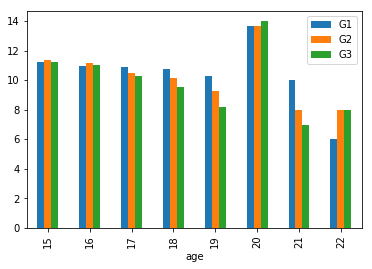

In [8]:
age_mean.plot(kind="bar")

- 统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

In [9]:
school_mean = df[["school", "G1", "G2", "G3"]].groupby("school").mean()
school_mean

,G1,G2,G3
school,,,
GP,10.939828,10.782235,10.489971
MS,10.673913,10.195652,9.847826


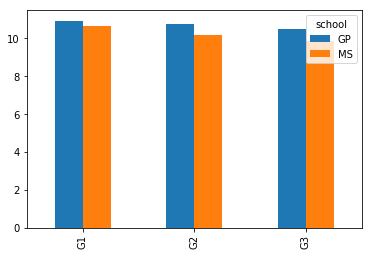

In [10]:
school_mean.T.plot(kind="bar")

- 统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

In [11]:
df["total_score"] = df["G1"] + df["G2"] + df["G3"]
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
ID,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26


In [12]:
df.groupby("school")["total_score"].nlargest(10)

school  ID 
GP      47     58
        110    56
        113    56
        42     55
        286    55
        129    54
        198    54
        245    54
        293    54
        8      53
MS      374    56
        359    50
        363    46
        391    46
        378    45
        376    44
        380    43
        351    39
        360    39
        366    39
Name: total_score, dtype: int64

In [13]:
df.loc[df.groupby("school")["total_score"].nlargest(10).unstack().columns, :]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
ID,,,,,,,,,,,,,,,,,,,,,
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,53
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,3,3,1,1,5,2,19,18,18,55
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,58
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,3,1,1,4,6,18,19,19,56
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,5,2,1,1,3,10,18,19,19,56
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,5,5,2,5,4,8,18,18,18,54
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,2,4,2,3,2,24,18,18,18,54
245,GP,M,16,U,GT3,T,2,1,other,other,...,3,3,1,1,4,6,18,18,18,54
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,3,3,1,2,2,5,18,18,19,55
